<a href="https://colab.research.google.com/github/victorbahlangene/Fastai-Docs/blob/main/Tutorials_Beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [2]:
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.4 MB/s eta 0:00:00


# Computer vision intro

In [4]:
from fastai.vision.all import *

In [5]:
path = untar_data(URLs.PETS)

In [6]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [7]:
files = get_image_files(path/"images")
len(files)

7390

In [8]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_16.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_190.jpg'))

## Single-label classification - With the data block API

In [9]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224))

In [10]:
datset_pets = pets.datasets(untar_data(URLs.PETS)/"images")

In [11]:
datset_pets[0]

(PILImage mode=RGB size=500x313, TensorCategory(6))

In [12]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images")

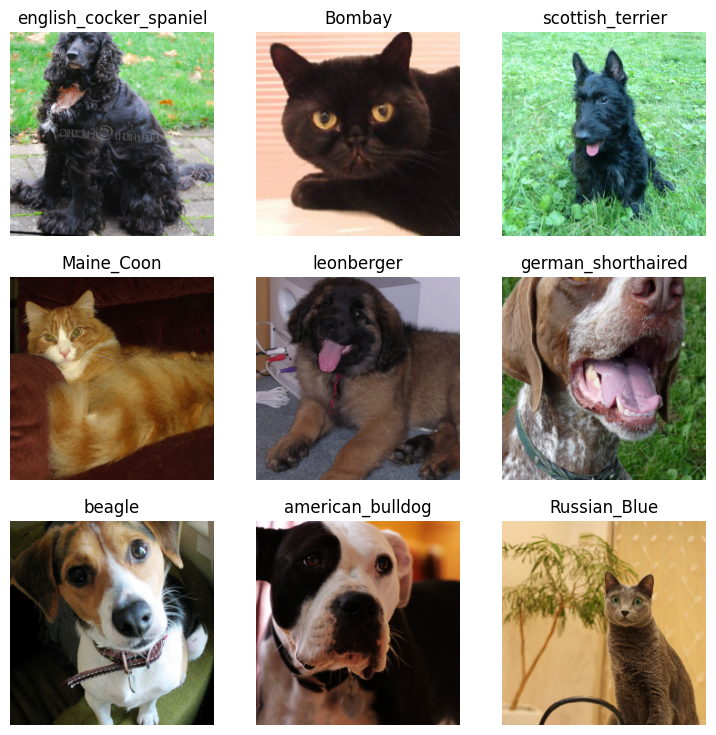

In [13]:
dls.show_batch(max_n=9)

## Multi-label classification

In [14]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/train.json'),Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/valid.json')]

In [15]:
df = pd.read_csv(path/"train.csv")
df.head()

fname        labels  is_valid
0  000005.jpg         chair      True
1  000007.jpg           car      True
2  000009.jpg  horse person      True
3  000012.jpg           car     False
4  000016.jpg       bicycle      True

### Multi-label classification - With the data block API

In [16]:
def get_x(r): return r["fname"]
def get_y(r): return r["labels"]

In [17]:
get_x(df)[2], get_y(df)[2]

('000009.jpg', 'horse person')

In [19]:
pascal = DataBlock(get_x = get_x, get_y = get_y)

dsets = pascal.datasets(df)
dsets.train[2]

('005517.jpg', 'chair pottedplant tvmonitor')

In [23]:
(path/"train").ls()

(#5012) [Path('/root/.fastai/data/pascal_2007/train/008209.jpg'),Path('/root/.fastai/data/pascal_2007/train/002049.jpg'),Path('/root/.fastai/data/pascal_2007/train/002571.jpg'),Path('/root/.fastai/data/pascal_2007/train/003110.jpg'),Path('/root/.fastai/data/pascal_2007/train/000427.jpg'),Path('/root/.fastai/data/pascal_2007/train/005345.jpg'),Path('/root/.fastai/data/pascal_2007/train/006229.jpg'),Path('/root/.fastai/data/pascal_2007/train/000605.jpg'),Path('/root/.fastai/data/pascal_2007/train/007579.jpg'),Path('/root/.fastai/data/pascal_2007/train/006381.jpg')...]

In [31]:
set_seed(42)

def get_x(r): return path/"train"/r["fname"]
def get_y(r): return r["labels"]

pascal = DataBlock(get_x = get_x, get_y = get_y,)

dsets = pascal.datasets(df)
dsets.train[0]

(Path('/root/.fastai/data/pascal_2007/train/008663.jpg'), 'car person')

In [35]:
df["labels"].str.split(" ").head()

0            [chair]
1              [car]
2    [horse, person]
3              [car]
4          [bicycle]
Name: labels, dtype: object

In [37]:
def get_y(r): return r["labels"].str.split(" ")

get_y(df).head()

0            [chair]
1              [car]
2    [horse, person]
3              [car]
4          [bicycle]
Name: labels, dtype: object

In [36]:
set_seed(42)

def get_x(r): return path/"train"/r["fname"]
def get_y(r): return r["labels"].str.split(" ")

pascal = DataBlock(get_x = get_x, get_y = get_y,)

dsets = pascal.datasets(df)
dsets.train[0]

AttributeError: ignored

In [39]:
doc(ColReader)

In [25]:
doc(DataBlock)

In [41]:
pascal = DataBlock(#blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=ColSplitter('is_valid'),
                   get_x=ColReader('fname', pref=str(path/'train') + os.path.sep),
                   get_y=ColReader('labels', label_delim=' '),
                   item_tfms = Resize(460),
                   batch_tfms=aug_transforms(size=224))

dsets = pascal.datasets(df)
dsets.train[2]

('/root/.fastai/data/pascal_2007/train/000023.jpg', ['bicycle', 'person'])

In [42]:
pascal = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=ColSplitter('is_valid'),
                   get_x=ColReader('fname', pref=str(path/'train') + os.path.sep),
                   get_y=ColReader('labels', label_delim=' '),
                   item_tfms = Resize(460),
                   batch_tfms=aug_transforms(size=224))

dsets = pascal.datasets(df)
dsets.train[2]

(PILImage mode=RGB size=334x500,
 TensorMultiCategory([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
                      0., 0., 0., 0., 0.]))

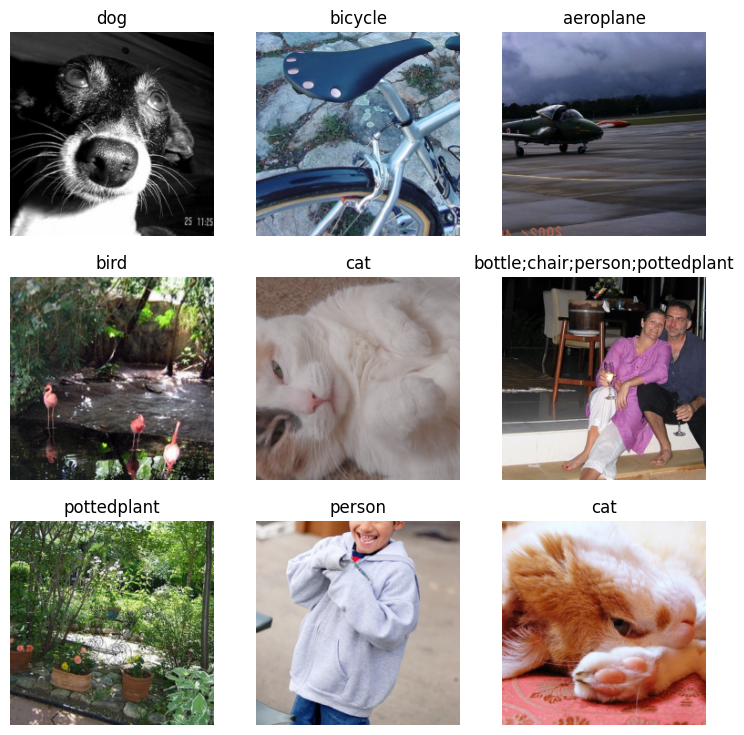

In [43]:
dls = pascal.dataloaders(df)
dls.show_batch(max_n=9)

In [44]:
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'
learn = vision_learner(dls, resnet50, metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:13<00:00, 7.83MB/s]


SuggestedLRs(valley=0.001737800776027143)

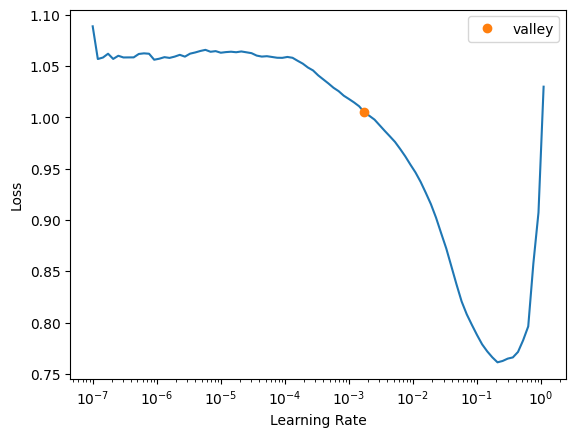

In [45]:
learn.lr_find()

In [46]:
3e-2

0.03

In [47]:
learn.fine_tune(2, 3e-2)

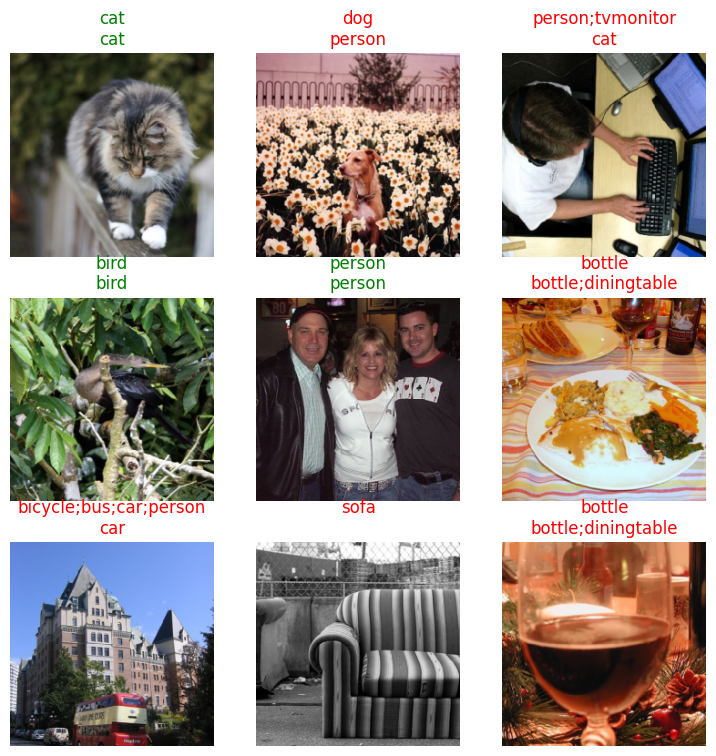

In [48]:
learn.show_results()

In [49]:
preds, preds_bool, preds_indx = learn.predict(path/'train/000005.jpg')

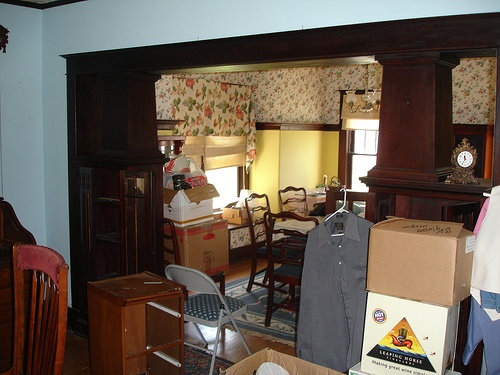

In [53]:
img = PILImage.create(path/'train/000005.jpg')
img

In [51]:
learn.dls.vocab

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

In [50]:
preds

(#2) ['chair','diningtable']

In [56]:
preds_bool

tensor([False, False, False, False, False, False, False, False,  True, False,
         True, False, False, False, False, False, False, False, False, False])

In [60]:
dls.vocab[preds_bool]

(#2) ['chair','diningtable']

In [62]:
preds_indx

tensor([3.3361e-04, 2.2876e-03, 3.7130e-04, 2.5432e-04, 1.1521e-02, 1.3018e-03,
        4.2198e-03, 6.5543e-03, 9.5737e-01, 1.8476e-04, 8.2944e-01, 7.9157e-03,
        1.2476e-04, 5.4392e-04, 9.9280e-02, 4.0432e-01, 1.2662e-04, 1.7245e-01,
        1.7413e-03, 1.1769e-01])

In [61]:
preds_indx[preds_bool]

tensor([0.9574, 0.8294])

In [64]:
preds, preds_indx[preds_bool]

((#2) ['chair','diningtable'], tensor([0.9574, 0.8294]))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


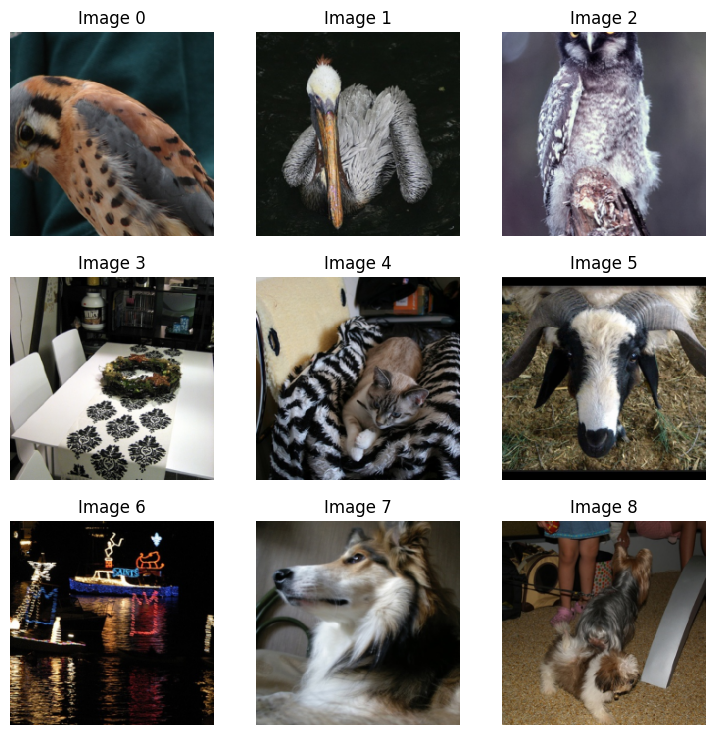

In [63]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

# Tabular Training
How to use the tabular application in fastai

To illustrate the tabular application, we will use the example of the Adult dataset where we have to predict if a person is earning more or less than $50k per year using some general data.

In [65]:
from fastai.tabular.all import *

In [66]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

(#3) [Path('/root/.fastai/data/adult_sample/adult.csv'),Path('/root/.fastai/data/adult_sample/models'),Path('/root/.fastai/data/adult_sample/export.pkl')]

In [67]:
df = pd.read_csv(path/'adult.csv')
df.head()

age          workclass  fnlwgt     education  education-num  \
0   49            Private  101320    Assoc-acdm           12.0   
1   44            Private  236746       Masters           14.0   
2   38            Private   96185       HS-grad            NaN   
3   38       Self-emp-inc  112847   Prof-school           15.0   
4   42   Self-emp-not-inc   82297       7th-8th            NaN   

        marital-status        occupation    relationship                 race  \
0   Married-civ-spouse               NaN            Wife                White   
1             Divorced   Exec-managerial   Not-in-family                White   
2             Divorced               NaN       Unmarried                Black   
3   Married-civ-spouse    Prof-specialty         Husband   Asian-Pac-Islander   
4   Married-civ-spouse     Other-service            Wife                Black   

       sex  capital-gain  capital-loss  hours-per-week  native-country salary  
0   Female             0          1902              40   United-States  >=50k  
1     Male         10520             0              45   United-States  >=50k  
2   Female             0             0              32   United-States   <50k  
3     Male             0             0              40   United-States  >=50k  
4   Female             0             0              50   United-States   <50k

In [68]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

## Tabualar Pandas

In [85]:
doc(TabularPandas)

In [71]:
RandomSplitter(valid_pct=0.2, seed=42)

<function fastai.data.transforms.RandomSplitter.<locals>._inner(o)>

In [74]:
len(range_of(df))

32561

In [72]:
RandomSplitter(valid_pct=0.2, seed=42)(df)

((#26049) [14860,30337,20177,23289,27833,28222,10731,775,9068,15458...],
 (#6512) [26459,14308,30129,7933,23325,4624,24726,19755,24006,30826...])

In [76]:
RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))

((#26049) [14860,30337,20177,23289,27833,28222,10731,775,9068,15458...],
 (#6512) [26459,14308,30129,7933,23325,4624,24726,19755,24006,30826...])

In [86]:
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))

to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
                   cont_names = ['age', 'fnlwgt', 'education-num'],
                   y_names='salary',
                   y_block=CategoryBlock(),
                   splits=splits)

In [87]:
to.show(5)

In [79]:
to.xs.iloc[:5]

workclass  education  marital-status  occupation  relationship  race  \
14860          6         11               3          11             1     5   
30337          5         16               3           4             1     5   
20177          8         12               7          14             5     3   
23289          5          1               5           4             4     5   
27833          5         12               1           7             2     5   

       education-num_na       age    fnlwgt  education-num  
14860                 1  0.471988  0.111838       2.321823  
30337                 1 -0.116316  0.093391      -0.030599  
20177                 1  0.839678 -0.273238      -0.422669  
23289                 1 -1.145848 -0.686475      -1.598881  
27833                 1 -0.116316  0.768865      -0.422669

In [82]:
to.ys.iloc[:5]

salary
14860       1
30337       1
20177       0
23289       0
27833       0

In [83]:
to.classes

{'workclass': ['#na#', ' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
 'education': ['#na#', ' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college'],
 'marital-status': ['#na#', ' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed'],
 'occupation': ['#na#', ' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service', ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving'],
 'relationship': ['#na#', ' Husband', ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried', ' Wife'],
 'race': ['#na#', ' Amer-Indian-Eskimo', ' Asian-Pac-Island

In [88]:
dls = to.dataloaders(bs=64)

dls.show_batch()

## tabular_learner

In [89]:
doc(tabular_learner)

In [90]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(1)

In [91]:
learn.show_results()

In [93]:
learn.dls.vocab

['<50k', '>=50k']

In [92]:
row, clas, probs = learn.predict(df.iloc[0])

In [95]:
row.show()

In [96]:
clas, probs

(tensor(1), tensor([0.4496, 0.5504]))

To get prediction on a new dataframe, you can use the test_dl method of the DataLoaders. That dataframe does not need to have the dependent variable in its column.

In [97]:
test_df = df.copy()
test_df.drop(['salary'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)

learn.get_preds(dl=dl)

(tensor([[0.4496, 0.5504],
         [0.4593, 0.5407],
         [0.9380, 0.0620],
         ...,
         [0.6052, 0.3948],
         [0.7468, 0.2532],
         [0.7409, 0.2591]]),
 None)

## fastai with Other Libraries

In [98]:
to.xs[:3]

workclass  education  marital-status  occupation  relationship  race  \
14860          6         11               3          11             1     5   
30337          5         16               3           4             1     5   
20177          8         12               7          14             5     3   

       education-num_na       age    fnlwgt  education-num  
14860                 1  0.471988  0.111838       2.321823  
30337                 1 -0.116316  0.093391      -0.030599  
20177                 1  0.839678 -0.273238      -0.422669

In [99]:
to.train.ys.values

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int8)

In [100]:
to.train.ys.values.ravel()

array([1, 1, 0, ..., 1, 0, 0], dtype=int8)

In [101]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [103]:
X_train.shape, y_train.shape

((26049, 10), (26049,))

In [104]:
X_test.shape, y_test.shape

((6512, 10), (6512,))

# Collaborative filtering

In [3]:
from fastai.tabular.all import *
from fastai.collab import *

## Training a model

In [4]:
path = untar_data(URLs.ML_100k)

In [5]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      usecols=(0,1,2), names=['user','movie','rating'])
ratings.head()

user  movie  rating
0   196    242       3
1   186    302       3
2    22    377       1
3   244     51       2
4   166    346       1

In [6]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1',
                     usecols=(0,1), names=('movie','title'), header=None)
movies.head()

movie              title
0      1   Toy Story (1995)
1      2   GoldenEye (1995)
2      3  Four Rooms (1995)
3      4  Get Shorty (1995)
4      5     Copycat (1995)

In [7]:
ratings = ratings.merge(movies)
ratings.head()

user  movie  rating         title
0   196    242       3  Kolya (1996)
1    63    242       3  Kolya (1996)
2   226    242       5  Kolya (1996)
3   154    242       3  Kolya (1996)
4   306    242       5  Kolya (1996)

We can then build a DataLoaders object from this table. By default, it takes the first column for user, the second column for the item (here our movies) and the third column for the ratings. We need to change the value of item_name in our case, to use the titles instead of the ids:

In [8]:
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)

In [9]:
dls.show_batch()

It uses a simple dot product model with 50 latent factors. To train it using the 1cycle policy, we just run this command:

In [10]:
doc(collab_learner)

In [11]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))

learn.fit_one_cycle(5, 5e-3, wd=0.1)

In [12]:
learn.loss_func

FlattenedLoss of MSELoss()

In [15]:
from math import sqrt
print(f"RMSE: {sqrt(0.81)}")

RMSE: 0.9


Here’s some benchmarks on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91

## Interpretation

Let’s analyze the results of our previous model. We will keep the 1000 most rated movies for this:

In [19]:
ratings.head(5)

user  movie  rating         title
0   196    242       3  Kolya (1996)
1    63    242       3  Kolya (1996)
2   226    242       5  Kolya (1996)
3   154    242       3  Kolya (1996)
4   306    242       5  Kolya (1996)

In [21]:
ratings.groupby("title")["rating"].count()

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [22]:
g = ratings.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)',
       'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)',
       'Air Force One (1997)', 'Independence Day (ID4) (1996)'],
      dtype=object)

### Movie bias
Our model has learned one bias per movie, a unique number independent of users that can be interpreted as the intrinsic “value” of the movie. We can grab the bias of each movie in our top_movies list with the following command:

In [24]:
movie_bias = learn.model.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [25]:
mean_ratings = ratings.groupby('title')['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

movies with the worst bias

In [26]:
item0 = lambda o:o[0]
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3817),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.2693), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2656),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2644), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2433), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2401), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2323), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2270), 'Thinner (1996)', 2.4489795918367347),
 (tensor(-0.2270), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2258), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2182), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2149), 'Beverly Hills Ninja (1997)', 2.3125),
 (tensor(-0.2055), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.1991), 'Escape from L.A. (1996)', 2.4615384615384617),
 (tensor

movies with the best bias:

In [27]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6286), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5816), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5722), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5622), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5472), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5242), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.5155), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5021), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4908), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.4530), 'Fargo (1996)', 4.155511811023622),
 (tensor(0.4522), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4468), 'Raiders of the Lost Ark (1981)', 4.252380952380952),
 (tensor(0.4444), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4297), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4261), 'North by Northwest (1959)', 4.284916201117318)]

### Movie weights
Now let’s try to analyze the latent factors our model has learned. We can grab the weights for each movie in top_movies the same way as we did for the bias before.

In [28]:
movie_w = learn.model.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 50])

Let’s try a PCA to reduce the dimensions and see if we can see what the model learned:

In [29]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [30]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

Here are the highest score on the first dimension:

In [31]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1225), 'Casablanca (1942)'),
 (tensor(1.1090), 'Wrong Trousers, The (1993)'),
 (tensor(1.0881), 'Chinatown (1974)'),
 (tensor(1.0442), 'Third Man, The (1949)'),
 (tensor(1.0382), 'Close Shave, A (1995)'),
 (tensor(1.0013),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(0.9995), 'Lawrence of Arabia (1962)'),
 (tensor(0.9638), 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (tensor(0.9501), 'Godfather, The (1972)'),
 (tensor(0.9486), 'Some Folks Call It a Sling Blade (1993)')]

And the worst:

In [32]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.3698), "McHale's Navy (1997)"),
 (tensor(-1.2532), 'Home Alone 3 (1997)'),
 (tensor(-1.2398), 'Leave It to Beaver (1997)'),
 (tensor(-1.1445), 'Stupids, The (1996)'),
 (tensor(-1.1188), 'Children of the Corn: The Gathering (1996)'),
 (tensor(-1.0986), 'Congo (1995)'),
 (tensor(-1.0984), 'Jungle2Jungle (1997)'),
 (tensor(-1.0715), 'Mortal Kombat: Annihilation (1997)'),
 (tensor(-1.0436), 'Grease 2 (1982)'),
 (tensor(-1.0368), 'Bio-Dome (1996)')]

And we can even plot the movies according to their scores on those dimensions:

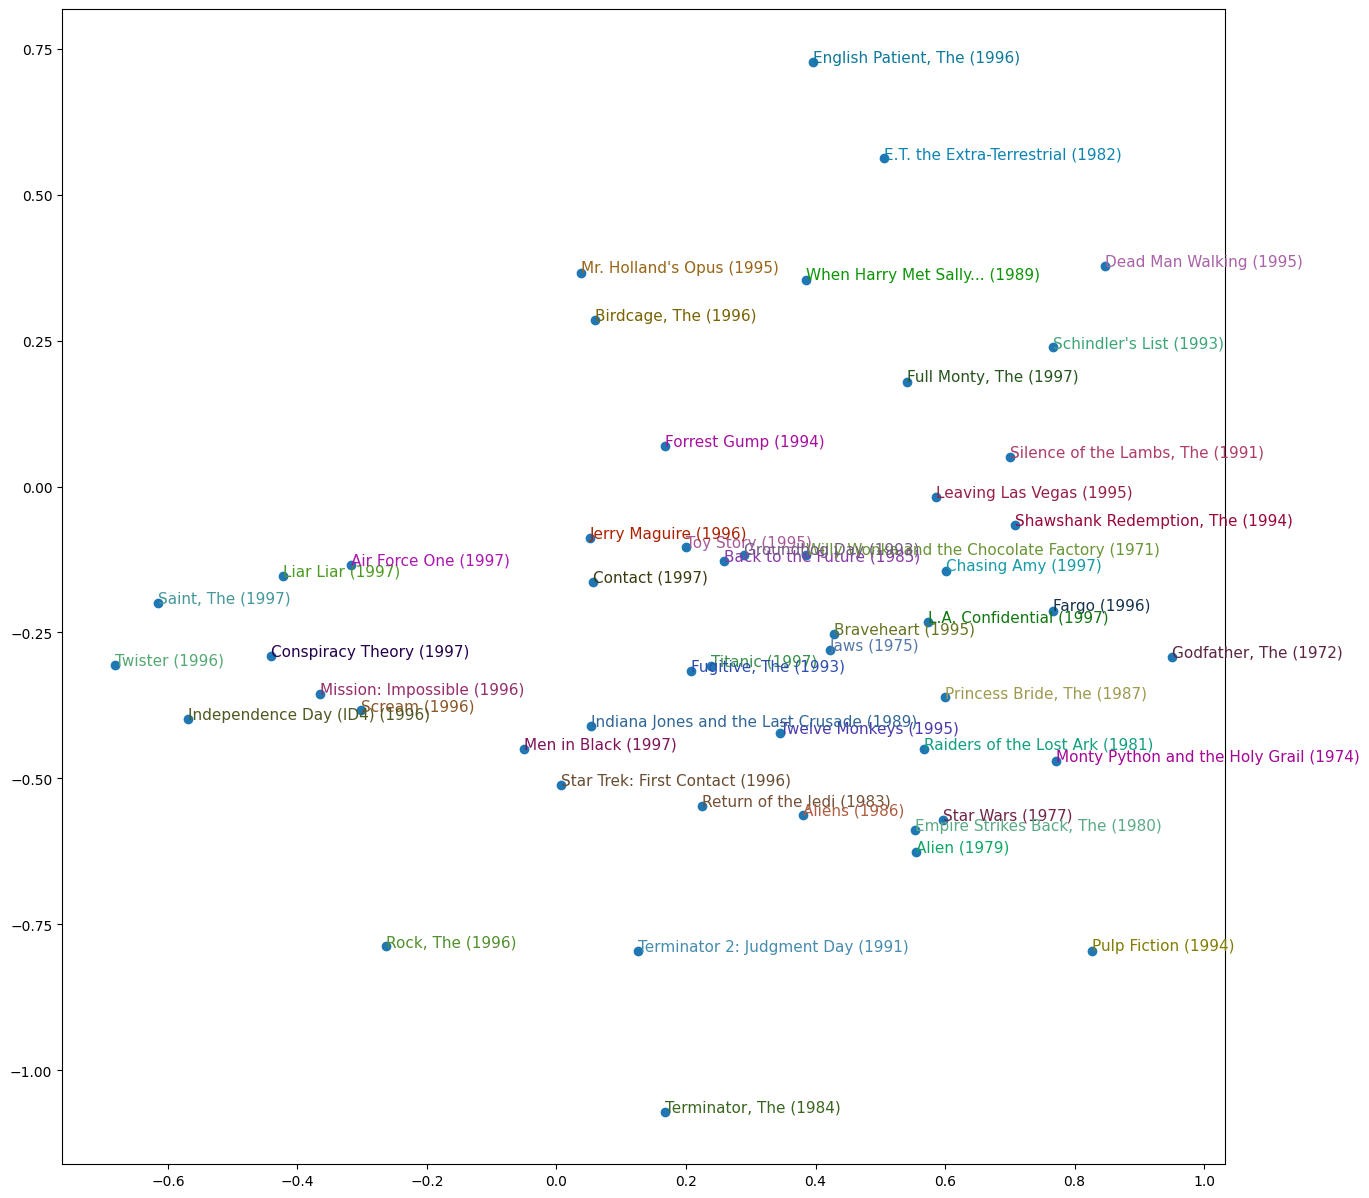

In [33]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()